##### In american football, to predict the passing yards for  quarterback, trying with adding previous year data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import seaborn

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
# file_path = r"../../../data/NCAA/input_data/ncaa_2024_input_data_v001.csv"
file_path_2024 = r"../../../../data/NFL/input_data/nfl_2024_player_stats_v001.csv"
team_stats_file_path_2024 = r"../../../../data/NFL/input_data/nfl_2024_team_stats_v002.csv"
file_path_2023 = r"../../../../data/NFL/input_data/nfl_2023_player_stats_v001.csv"
team_stats_file_path_2023 = r"../../../../data/NFL/input_data/nfl_2023_team_stats_v001.csv"
file_path_2022 = r"../../../../data/NFL/input_data/nfl_2022_player_stats_v001.csv"
team_stats_file_path_2022 = r"../../../../data/NFL/input_data/nfl_2022_team_stats_v001.csv"
file_path_2021 = r"../../../../data/NFL/input_data/nfl_2021_player_stats_v001.csv"
team_stats_file_path_2021 = r"../../../../data/NFL/input_data/nfl_2021_team_stats_v001.csv"
file_path_2020 = r"../../../../data/NFL/input_data/nfl_2020_player_stats_v001.csv"
team_stats_file_path_2020 = r"../../../../data/NFL/input_data/nfl_2020_team_stats_v001.csv"

# df = pd.read_csv(file_path_)
# df_team = pd.read_excel(team_stats_file_path)
# df = pd.read_excel(file_path, sheet_name= 0, skiprows=[1])

In [3]:
def read_csv(list):
    results = []
    for addr in list:
        df = pd.read_csv(addr)
        # print(df.head())
        results.append(df)
    return results


# players_df_list = read_csv([file_path_2023, file_path_2024])
# team_df_list = read_csv([ team_stats_file_path_2023, team_stats_file_path_2024])

players_df_list = read_csv([file_path_2020, file_path_2021, file_path_2022, file_path_2023, file_path_2024])
team_df_list = read_csv([ team_stats_file_path_2020, team_stats_file_path_2021, team_stats_file_path_2022, team_stats_file_path_2023, team_stats_file_path_2024])

C:\Users\PrudhviRajuV\AppData\Local\Temp\ipykernel_43404\3179048892.py:4: DtypeWarning: Columns (182) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(addr)


In [4]:
# print(players_df_list)

In [5]:
df = pd.concat(players_df_list)
df_team = pd.concat(team_df_list)

In [6]:
df.head()
df_team.head()

,game_id,game_sr_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,game_date,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_tlost,rushing_tlost_yards,rushing_yards,rushing_longest,rushing_longest_touchdown,rushing_redzone_attempts,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_targets,receiving_receptions,receiving_avg_yards,receiving_yards,receiving_touchdowns,receiving_yards_after_catch,receiving_longest,receiving_longest_touchdown,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,punts_attempts,punts_yards,punts_net_yards,punts_blocked,punts_touchbacks,punts_inside_20,punts_return_yards,punts_avg_net_yards,punts_avg_yards,punts_longest,punts_hang_time,punts_avg_hang_time,punt_returns_avg_yards,punt_returns_yards,punt_returns_longest,punt_returns_touchdowns,punt_returns_faircatches,punt_returns_number,penalties_penalties,penalties_yards,passing_attempts,passing_completions,passing_cmp_pct,passing_interceptions,passing_sack_yards,passing_rating,passing_touchdowns,passing_avg_yards,passing_sacks,passing_longest,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_net_yards,passing_yards,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_batted_passes,passing_on_target_throws,misc_returns_yards,misc_returns_touchdowns,misc_returns_blk_fg_touchdowns,misc_returns_blk_punt_touchdowns,misc_returns_fg_return_touchdowns,misc_returns_ez_rec_touchdowns,misc_returns_number,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_net_attempts,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,first_downs_pass,first_downs_penalty,first_downs_rush,first_downs_total,interceptions_return_yards,interceptions_returned,interceptions_number,touchdowns_pass,touchdowns_rush,touchdowns_total_return,touchdowns_total,touchdowns_fumble_return,touchdowns_int_return,touchdowns_kick_return,touchdowns_punt_return,touchdowns_other,efficiency_goaltogo_attempts,efficiency_goaltogo_successes,efficiency_goaltogo_pct,efficiency_redzone_attempts,efficiency_redzone_successes,efficiency_redzone_pct,efficiency_thirddown_attempts,efficiency_thirddown_successes,efficiency_thirddown_pct,eff

In [7]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'player_name',
 'player_id',
 'team_name',
 'team_id',
 'team_sr_id',
 'opponent_name',
 'opponent_id',
 'opponent_sr_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'game_date',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_longest_touchdown',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_longest_touchdown',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_air_yards',
 'receiving_broken_tackles',
 'receiving_dropped_passes',
 'receiving_catchable_passes',
 'receiving_yards_after_contact',
 'punts_attempts',
 'punts_yards',
 'punts_avg_yards',
 'punts_blocked',
 'punts_

In [8]:
df[df['team_position'] == 'QB'].head()

,game_id,game_sr_id,player_name,player_id,team_name,team_id,team_sr_id,opponent_name,opponent_id,opponent_sr_id,team_market,team_alias,team_position,team_jersey,game_date,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_longest_touchdown,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_longest_touchdown,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_penalties,penalties_yards,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_first_downs,receiving_first_downs,passing_first_downs,penalties_first_downs,passing_int_touchdowns,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries,rushing_sr_id,receiving_sr_id,punts_sr_id,punt_returns_sr_id,penalties_sr_id,passing_sr_id,kickoffs_sr_id,kick_returns_sr_id,int_returns_sr_id,fumbles_sr_id,field_goals_sr_id,defense_sr_id,misc_returns_sr_id
2,0018213e-8423-40ab-b60d-562de98b6330,sr:match:21980921,Jared Goff,aba8f925-ffbf-4654-bfa7-a25d3d237494,Rams,2eff2a03-54d4-46ba-890e-2bc3925548f3,sr:competitor:4387,Giants,04aa1c9d-66da-489d-b16a-1dee3f2eec4d,sr:competitor:4426,Los Angeles,LA,QB,16.0,2020-10-04,-1.0,3.0,0.0,-3.0,-1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
df.team_position.unique()

array(['WR', 'QB', 'TE', 'RB', 'P', 'CB', 'K', 'DL', 'ILB', 'S', 'OLB',
       'DB', 'DT', 'LB', 'T', 'G', 'FB', 'DE', 'DB/LB', 'OL', 'C', 'LS',
       'HB', 'OT', 'NT', 'RB/WR', 'G/T', 'K/P', 'SS', 'MLB', 'C/G',
       'DE/LB', 'FS', 'FB/RB', 'FB/DL', 'WR/RS', 'LB/FB', 'G/C', 'DT/DE',
       'TE/DE', 'CB/RS', 'G/OT', 'T/G', 'SAF', 'OG'], dtype=object)

In [10]:
df.columns.to_list()

['game_id',
 'game_sr_id',
 'player_name',
 'player_id',
 'team_name',
 'team_id',
 'team_sr_id',
 'opponent_name',
 'opponent_id',
 'opponent_sr_id',
 'team_market',
 'team_alias',
 'team_position',
 'team_jersey',
 'game_date',
 'rushing_avg_yards',
 'rushing_attempts',
 'rushing_touchdowns',
 'rushing_yards',
 'rushing_longest',
 'rushing_longest_touchdown',
 'rushing_redzone_attempts',
 'rushing_tlost',
 'rushing_tlost_yards',
 'rushing_broken_tackles',
 'rushing_kneel_downs',
 'rushing_scrambles',
 'rushing_yards_after_contact',
 'receiving_receptions',
 'receiving_targets',
 'receiving_yards',
 'receiving_avg_yards',
 'receiving_longest',
 'receiving_touchdowns',
 'receiving_longest_touchdown',
 'receiving_yards_after_catch',
 'receiving_redzone_targets',
 'receiving_air_yards',
 'receiving_broken_tackles',
 'receiving_dropped_passes',
 'receiving_catchable_passes',
 'receiving_yards_after_contact',
 'punts_attempts',
 'punts_yards',
 'punts_avg_yards',
 'punts_blocked',
 'punts_

In [11]:
# df = df.drop(columns=['team'])
df.team_position.unique()

array(['WR', 'QB', 'TE', 'RB', 'P', 'CB', 'K', 'DL', 'ILB', 'S', 'OLB',
       'DB', 'DT', 'LB', 'T', 'G', 'FB', 'DE', 'DB/LB', 'OL', 'C', 'LS',
       'HB', 'OT', 'NT', 'RB/WR', 'G/T', 'K/P', 'SS', 'MLB', 'C/G',
       'DE/LB', 'FS', 'FB/RB', 'FB/DL', 'WR/RS', 'LB/FB', 'G/C', 'DT/DE',
       'TE/DE', 'CB/RS', 'G/OT', 'T/G', 'SAF', 'OG'], dtype=object)

In [12]:
df.rushing_touchdowns.value_counts(normalize=True).sort_index()

rushing_touchdowns
0.0    0.814638
1.0    0.153616
2.0    0.028395
3.0    0.003086
4.0    0.000176
6.0    0.000088
Name: proportion, dtype: float64

In [13]:
df = df[df['team_position'] == 'RB']

In [14]:
df.describe()

,team_jersey,rushing_avg_yards,rushing_attempts,rushing_touchdowns,rushing_yards,rushing_longest,rushing_longest_touchdown,rushing_redzone_attempts,rushing_tlost,rushing_tlost_yards,rushing_broken_tackles,rushing_kneel_downs,rushing_scrambles,rushing_yards_after_contact,receiving_receptions,receiving_targets,receiving_yards,receiving_avg_yards,receiving_longest,receiving_touchdowns,receiving_longest_touchdown,receiving_yards_after_catch,receiving_redzone_targets,receiving_air_yards,receiving_broken_tackles,receiving_dropped_passes,receiving_catchable_passes,receiving_yards_after_contact,punts_attempts,punts_yards,punts_avg_yards,punts_blocked,punts_longest,punts_touchbacks,punts_inside_20,punts_avg_net_yards,punts_return_yards,punts_net_yards,punts_hang_time,punts_avg_hang_time,punt_returns_yards,punt_returns_avg_yards,punt_returns_touchdowns,punt_returns_longest,punt_returns_faircatches,punt_returns_number,penalties_penalties,penalties_yards,passing_attempts,passing_completions,passing_cmp_pct,passing_yards,passing_avg_yards,passing_sacks,passing_sack_yards,passing_touchdowns,passing_longest,passing_interceptions,passing_rating,passing_longest_touchdown,passing_air_yards,passing_redzone_attempts,passing_throw_aways,passing_poor_throws,passing_defended_passes,passing_dropped_passes,passing_spikes,passing_blitzes,passing_hurries,passing_knockdowns,passing_pocket_time,passing_avg_pocket_time,passing_batted_passes,passing_on_target_throws,kickoffs_endzone,kickoffs_inside_20,kickoffs_return_yards,kickoffs_touchbacks,kickoffs_yards,kickoffs_out_of_bounds,kickoffs_number,kickoffs_total_endzone,kickoffs_onside_attempts,kickoffs_onside_successes,kickoffs_squib_kicks,kick_returns_avg_yards,kick_returns_yards,kick_returns_longest,kick_returns_touchdowns,kick_returns_faircatches,kick_returns_number,int_returns_avg_yards,int_returns_yards,int_returns_longest,int_returns_touchdowns,int_returns_number,fumbles_fumbles,fumbles_lost_fumbles,fumbles_own_rec,fumbles_own_rec_yards,fumbles_opp_rec,fumbles_opp_rec_yards,fumbles_out_of_bounds,fumbles_forced_fumbles,fumbles_own_rec_tds,fumbles_opp_rec_tds,fumbles_ez_rec_tds,field_goals_attempts,field_goals_made,field_goals_blocked,field_goals_yards,field_goals_avg_yards,field_goals_longest,field_goals_missed,field_goals_pct,field_goals_attempts_19,field_goals_attempts_29,field_goals_attempts_39,field_goals_attempts_49,field_goals_attempts_50,field_goals_made_19,field_goals_made_29,field_goals_made_39,field_goals_made_49,field_goals_made_50,defense_tackles,defense_assists,defense_combined,defense_sacks,defense_sack_yards,defense_interceptions,defense_passes_defended,defense_forced_fumbles,defense_fumble_recoveries,defense_qb_hits,defense_tloss,defense_tloss_yards,defense_safeties,defense_sp_tackles,defense_sp_assists,defense_sp_forced_fumbles,defense_sp_fumble_recoveries,defense_sp_blocks,defense_misc_tackles,defense_misc_assists,defense_misc_forced_fumbles,defense_misc_fumble_recoveries,defense_def_targets,defense_def_comps,defense_blitzes,defense_hurries,defense_knockdowns,defense_missed_tackles,defense_batted_passes,rushing_first_downs,receiving_first_downs,passing_first_downs,penalties_first_downs,passing_int_touchdowns,defense_sp_own_fumble_recoveries,defense_sp_opp_fumble_recoveries
count,14968.000000,6348.000000,6348.000000,6348.000000,6348.000000,6348.000000,2378.000000,6348.000000,6348.000000,6348.000000,6348.000000,6348.0,6348.000000,6348.000000,5265.000000,5265.000000,5265.000000,5265.000000,5185.000000,5265.000000,1352.000000,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,5265.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.000000,174.000000,174.0,167.000000,174.000000,174.000000,252.000000,252.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,25.00000,31.000000,25.000000,10.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,2.0,2.000000,

In [15]:
df.shape

(14968, 188)

In [16]:
len(df.game_id.unique())

1343

In [17]:
df.isna().sum()

game_id                                 0
game_sr_id                           3073
player_name                             0
player_id                               0
team_name                               0
team_id                                 0
team_sr_id                           3073
opponent_name                           0
opponent_id                          3073
opponent_sr_id                       3073
team_market                             0
team_alias                              0
team_position                           0
team_jersey                             0
game_date                            3073
rushing_avg_yards                    8620
rushing_attempts                     8620
rushing_touchdowns                   8620
rushing_yards                        8620
rushing_longest                      8620
rushing_longest_touchdown           12590
rushing_redzone_attempts             8620
rushing_tlost                        8620
rushing_tlost_yards               

In [18]:
df = df[df['rushing_yards'].notna()]

In [19]:
df.isna().sum()

game_id                                0
game_sr_id                          1290
player_name                            0
player_id                              0
team_name                              0
team_id                                0
team_sr_id                          1290
opponent_name                          0
opponent_id                         1290
opponent_sr_id                      1290
team_market                            0
team_alias                             0
team_position                          0
team_jersey                            0
game_date                           1290
rushing_avg_yards                      0
rushing_attempts                       0
rushing_touchdowns                     0
rushing_yards                          0
rushing_longest                        0
rushing_longest_touchdown           3970
rushing_redzone_attempts               0
rushing_tlost                          0
rushing_tlost_yards                    0
rushing_broken_t

In [20]:
df.shape

(6348, 188)

In [21]:
# Function to impute missing values based on group mean
def impute_by_group(df, group_cols, impute_cols):
    for col in impute_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
    return df

##### function to treat outliers

In [22]:
def treat_outliers(df, columns):
    for column in columns:
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)
        
        IQR = q3 - q1
        upper_whisker = q3 + 1.5 * IQR
        lower_whisker = q1 - 1.5 * IQR

        df[column] = np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))
    return df

#### Function to calcuate the aggregate metrics for player at career and opponent level

In [23]:
def calculate_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['player_id', 'opponent_name']
        else:
            grouped_cols = ['player_id']
        sort_cols = grouped_cols + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


#### Function to calcuate the aggregate metrics for team at career and opponent level

In [24]:
def calculate_team_agg_features(df, feat_trans_dict, rolling_window, trans_level, min_games = 1):

    '''
    df will be the dataframe containing the raw data to be transformed

    feat_trans_dict is a dictionary that has column - type of transformation as a key value pair. ex. {'ERA' : pd.Series.mean}

    rolling window represents the window for which the aggregation to be done

    trans_level indicates if the pitcher metric aggregation to be done for a specific opponent or entire career
    '''  

    for level in trans_level:
        if level == 'opponent':
            grouped_cols = ['team_id', 'opponent_id']
        else:
            grouped_cols = ['team_id']
        sort_cols = grouped_cols  + ['game_date']

        df = df.sort_values(by=sort_cols)
        # print(df.columns)

        for col, transform_type in feat_trans_dict.items():
            # print(col, transform_type)
            df[f'shifted_{col}'] = df.groupby(grouped_cols)[col].shift(1)
            if transform_type == 'sum':
                df[f'{col}_prev_{rolling_window}_games_{level}_sum'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).sum())
            elif transform_type == 'mean':
                df[f'{col}_prev_{rolling_window}_games_{level}_mean'] = df.groupby(grouped_cols)[f'shifted_{col}'].transform(lambda x: x.rolling(window=rolling_window, min_periods=min_games).mean())
            df.drop(columns=[ f'shifted_{col}'], inplace=True)
    return df


In [25]:
qb_aggregation_metrics = {
    # --- Core Passing Statistics ---
    # 'passing_attempts': 'sum',
    # 'passing_completions': 'sum',
    # 'passing_cmp_pct': 'mean',
    # 'passing_yards': 'sum',  # Crucial lagged feature for prediction
    # 'passing_avg_yards': 'mean',
    # 'passing_touchdowns': 'sum',
    # 'passing_interceptions': 'sum',
    # 'passing_rating': 'mean',
    # 'passing_first_downs': 'sum',
    # 'passing_redzone_attempts': 'sum',
    # 'passing_int_touchdowns': 'sum',

    # --- Passing Efficiency and Context Metrics (newly added) ---
    # 'passing_longest': 'mean',
    # 'passing_longest_touchdown': 'mean',
    # 'passing_air_yards': 'sum',           # Total yards the ball traveled in the air
    # 'passing_on_target_throws': 'sum',    # New metric for QB accuracy
    # 'passing_defended_passes': 'sum',     # Receiver-related, but reflects QB's passing success
    # 'passing_dropped_passes': 'sum',      # Important new feature on receiver performance
    # 'passing_throw_aways': 'sum',         # Reflects QB's decision-making under pressure
    # 'passing_poor_throws': 'sum',         # Another key metric on QB accuracy
    # 'passing_spikes': 'sum',              # Game management plays
    # 'passing_batted_passes': 'sum',       # Reflects offensive line and opponent's defensive line performance

    # --- Offensive Line and Pressure Metrics (newly added) ---
    # 'passing_sacks': 'sum',
    # 'passing_sack_yards': 'sum',
    # 'passing_blitzes': 'sum',             # Number of blitzes faced by the QB
    # 'passing_hurries': 'sum',             # Number of times the QB was hurried
    # 'passing_knockdowns': 'sum',          # Number of times the QB was knocked down
    # 'passing_pocket_time': 'sum',         # Total time the QB had in the pocket
    # 'passing_avg_pocket_time': 'mean',    # Average time the QB had in the pocket

    # --- Rushing Statistics (for mobile QBs) ---
    'rushing_attempts': 'sum',
    'rushing_yards': 'sum',
    'rushing_touchdowns': 'sum',
    'rushing_first_downs': 'sum',
    'rushing_avg_yards': 'mean',
    'rushing_longest': 'mean',
    'rushing_redzone_attempts': 'sum',
    'rushing_tlost': 'sum',
    'rushing_tlost_yards': 'sum',
    'rushing_broken_tackles': 'sum',      # New metric for a QB's rushing ability
    'rushing_scrambles': 'sum',           # New metric for a QB's mobility
    'rushing_yards_after_contact': 'sum', # New metric for a QB's physicality

    # --- Fumbles (Ball Security) ---
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'fumbles_own_rec': 'sum',
    # 'fumbles_own_rec_yards': 'sum',
    # 'fumbles_ez_rec_tds': 'sum',
    # 'fumbles_own_rec_tds': 'sum',
    # 'fumbles_out_of_bounds': 'sum',

    # --- Penalties ---
    # 'penalties_penalties': 'sum',
    # 'penalties_yards': 'sum',
}

In [26]:
team_aggregation_metrics = {
    # --- Defensive Statistics (Most critical for opponent QB passing yards) ---
    'defense_tackles': 'sum',
    'defense_assists': 'sum',
    'defense_combined': 'sum',
    'defense_sacks': 'sum',
    'defense_sack_yards': 'sum',
    'defense_interceptions': 'sum',
    'defense_passes_defended': 'sum',
    'defense_forced_fumbles': 'sum',
    'defense_fumble_recoveries': 'sum',
    'defense_qb_hits': 'sum',
    'defense_tloss': 'sum',
    'defense_tloss_yards': 'sum',
    'defense_safeties': 'sum',
    'defense_blitzes': 'sum',
    'defense_hurries': 'sum',
    'defense_knockdowns': 'sum',
    'defense_missed_tackles': 'sum',
    'defense_batted_passes': 'sum',
    'defense_def_targets': 'sum',
    'defense_def_comps': 'sum',
    'defense_three_and_outs_forced': 'sum',
    'defense_fourth_down_stops': 'sum',

    # --- Opponent Offensive Statistics (reflects game script and time of possession) ---
    # These metrics from the *opponent's* perspective can influence the game state
    # and thus how many passing opportunities the QB might have.
    # 'rushing_attempts': 'sum',
    # 'rushing_yards': 'sum',
    # 'rushing_touchdowns': 'sum',
    # 'passing_attempts': 'sum',
    # 'passing_yards': 'sum',
    # 'passing_touchdowns': 'sum',
    # 'penalties_yards': 'sum', # Penalties conceded by the opponent
    # 'fumbles_fumbles': 'sum',
    # 'fumbles_lost_fumbles': 'sum',
    # 'first_downs_pass': 'sum',
    # 'first_downs_rush': 'sum',
    # 'first_downs_penalty': 'sum',
    # 'first_downs_total': 'sum',
    # 'touchdowns_pass': 'sum',
    # 'touchdowns_rush': 'sum',
    # 'touchdowns_total': 'sum',

    # --- Efficiency Metrics (reflects how well the team converts opportunities) ---
    'efficiency_goaltogo_attempts': 'sum',
    'efficiency_goaltogo_successes': 'sum',
    'efficiency_goaltogo_pct': 'mean',
    'efficiency_redzone_attempts': 'sum',
    'efficiency_redzone_successes': 'sum',
    'efficiency_redzone_pct': 'mean',
    'efficiency_thirddown_attempts': 'sum',
    'efficiency_thirddown_successes': 'sum',
    'efficiency_thirddown_pct': 'mean',
    'efficiency_fourthdown_attempts': 'sum',
    'efficiency_fourthdown_successes': 'sum',
    'efficiency_fourthdown_pct': 'mean',

    # --- Special Teams (can influence field position and game momentum) ---
    # 'punts_attempts': 'sum',
    # 'punts_yards': 'sum',
    # 'punts_avg_yards': 'mean',
    # 'punts_net_yards': 'sum',
    # 'punt_returns_yards': 'sum',
    # 'kickoffs_yards': 'sum',
    # 'kick_returns_yards': 'sum',
    # 'field_goals_attempts': 'sum',
    # 'field_goals_made': 'sum',
    # 'field_goals_pct': 'mean',
    # 'misc_returns_yards': 'sum', # General returns, could affect field position
}


In [27]:
df_transformed = calculate_agg_features(df.copy(), qb_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])
df_team_transformed = calculate_team_agg_features(df_team.copy(), team_aggregation_metrics, rolling_window=7, min_games=1, trans_level=['career'])


In [28]:
# df.columns.to_list()

In [29]:
df_combined = pd.merge(df_transformed, df_team_transformed, left_on = ['opponent_name', 'game_id'], right_on = ['team_name', 'game_id'])

In [30]:
print(df_transformed.shape)
print(df_team_transformed.shape)
print(df_combined.shape)

(6348, 200)
(2686, 244)
(6348, 443)


In [31]:
df_combined.columns.to_list()

['game_id',
 'game_sr_id_x',
 'player_name',
 'player_id',
 'team_name_x',
 'team_id_x',
 'team_sr_id_x',
 'opponent_name_x',
 'opponent_id_x',
 'opponent_sr_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'game_date_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
 'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_longest_touchdown_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_longest_touchdown_x',
 'receiving_yards_after_catch_x',
 'receiving_redzone_targets_x',
 'receiving_air_yards_x',
 'receiving_broken_tackles_x',
 'receiving_dropped_passes_x',
 'receiving_catchable_passes_x',
 'receiving_yards_after_contact_x',
 'punts

In [32]:
combined_cols_to_drop = [
 'game_id',
 'game_sr_id_x',
 'player_name',
 'player_id',
 'team_name_x',
 'team_id_x',
 'team_sr_id_x',
 'opponent_name_x',
 'opponent_id_x',
 'opponent_sr_id_x',
 'team_market_x',
 'team_alias_x',
 'team_position',
 'team_jersey',
 'game_date_x',
 'rushing_first_downs_x',
 'rushing_avg_yards_x',
 'rushing_attempts_x',
#  'rushing_touchdowns_x',
 'rushing_yards_x',
 'rushing_longest_x',
 'rushing_redzone_attempts_x',
 'rushing_tlost_x',
 'rushing_tlost_yards_x',
 'rushing_broken_tackles_x',
 'rushing_kneel_downs_x',
 'rushing_scrambles_x',
 'rushing_yards_after_contact_x',
 'receiving_first_downs_x',
 'receiving_receptions_x',
 'receiving_targets_x',
 'receiving_yards_x',
 'receiving_avg_yards_x',
 'receiving_longest_x',
 'receiving_touchdowns_x',
 'receiving_yards_after_catch_x',
 'receiving_redzone_targets_x',
 'receiving_air_yards_x',
 'receiving_broken_tackles_x',
 'receiving_dropped_passes_x',
 'receiving_catchable_passes_x',
 'receiving_yards_after_contact_x',
 'receiving_longest_touchdown_x',
 'punts_attempts_x',
 'punts_yards_x',
 'punts_avg_yards_x',
 'punts_blocked_x',
 'punts_longest_x',
 'punts_touchbacks_x',
 'punts_inside_20_x',
 'punts_avg_net_yards_x',
 'punts_return_yards_x',
 'punts_net_yards_x',
 'punts_hang_time_x',
 'punts_avg_hang_time_x',
 'punt_returns_yards_x',
 'punt_returns_avg_yards_x',
 'punt_returns_touchdowns_x',
 'punt_returns_longest_x',
 'punt_returns_faircatches_x',
 'punt_returns_number_x',
 'penalties_first_downs_x',
 'penalties_penalties_x',
 'penalties_yards_x',
 'passing_first_downs_x',
 'passing_attempts_x',
 'passing_completions_x',
 'passing_cmp_pct_x',
 'passing_yards_x',
 'passing_avg_yards_x',
 'passing_sacks_x',
 'passing_sack_yards_x',
 'passing_touchdowns_x',
 'passing_longest_x',
 'passing_interceptions_x',
 'passing_rating_x',
 'passing_longest_touchdown_x',
 'passing_air_yards_x',
 'passing_redzone_attempts_x',
 'passing_int_touchdowns_x',
 'passing_throw_aways_x',
 'passing_poor_throws_x',
 'passing_defended_passes_x',
 'passing_dropped_passes_x',
 'passing_spikes_x',
 'passing_blitzes_x',
 'passing_hurries_x',
 'passing_knockdowns_x',
 'passing_pocket_time_x',
 'passing_avg_pocket_time_x',
 'passing_batted_passes_x',
 'passing_on_target_throws_x',
 'kickoffs_endzone_x',
 'kickoffs_inside_20_x',
 'kickoffs_return_yards_x',
 'kickoffs_touchbacks_x',
 'kickoffs_yards_x',
 'kickoffs_out_of_bounds_x',
 'kickoffs_number_x',
 'kickoffs_total_endzone_x',
 'kickoffs_onside_attempts_x',
 'kickoffs_onside_successes_x',
 'kickoffs_squib_kicks_x',
 'kick_returns_avg_yards_x',
 'kick_returns_yards_x',
 'kick_returns_longest_x',
 'kick_returns_touchdowns_x',
 'kick_returns_faircatches_x',
 'kick_returns_number_x',
 'fumbles_fumbles_x',
 'fumbles_lost_fumbles_x',
 'fumbles_own_rec_x',
 'fumbles_own_rec_yards_x',
 'fumbles_opp_rec_x',
 'fumbles_opp_rec_yards_x',
 'fumbles_out_of_bounds_x',
 'fumbles_forced_fumbles_x',
 'fumbles_own_rec_tds_x',
 'fumbles_opp_rec_tds_x',
 'fumbles_ez_rec_tds_x',
 'field_goals_attempts_x',
 'field_goals_made_x',
 'field_goals_blocked_x',
 'field_goals_yards_x',
 'field_goals_avg_yards_x',
 'field_goals_longest_x',
 'field_goals_missed_x',
 'field_goals_pct_x',
 'field_goals_attempts_19_x',
 'field_goals_attempts_29_x',
 'field_goals_attempts_39_x',
 'field_goals_attempts_49_x',
 'field_goals_attempts_50_x',
 'field_goals_made_19_x',
 'field_goals_made_29_x',
 'field_goals_made_39_x',
 'field_goals_made_49_x',
 'field_goals_made_50_x',
 'defense_tackles_x',
 'defense_assists_x',
 'defense_combined_x',
 'defense_sacks_x',
 'defense_sack_yards_x',
 'defense_interceptions_x',
 'defense_passes_defended_x',
 'defense_forced_fumbles_x',
 'defense_fumble_recoveries_x',
 'defense_qb_hits_x',
 'defense_tloss_x',
 'defense_tloss_yards_x',
 'defense_safeties_x',
 'defense_sp_tackles_x',
 'defense_sp_assists_x',
 'defense_sp_forced_fumbles_x',
 'defense_sp_fumble_recoveries_x',
 'defense_sp_blocks_x',
 'defense_misc_tackles_x',
 'defense_misc_assists_x',
 'defense_misc_forced_fumbles_x',
 'defense_misc_fumble_recoveries_x',
 'defense_def_targets_x',
 'defense_def_comps_x',
 'defense_blitzes_x',
 'defense_hurries_x',
 'defense_knockdowns_x',
 'defense_missed_tackles_x',
 'defense_batted_passes_x',
 'defense_sp_own_fumble_recoveries_x',
 'defense_sp_opp_fumble_recoveries_x',
 'rushing_longest_touchdown_x',
 'int_returns_avg_yards_x',
 'int_returns_yards_x',
 'int_returns_longest_x',
 'int_returns_touchdowns_x',
 'int_returns_number_x',
 'rushing_sr_id',
 'receiving_sr_id',
 'punts_sr_id',
 'punt_returns_sr_id',
 'penalties_sr_id',
 'passing_sr_id',
 'kickoffs_sr_id',
 'kick_returns_sr_id',
 'int_returns_sr_id',
 'fumbles_sr_id',
 'field_goals_sr_id',
 'defense_sr_id',
 'misc_returns_sr_id',
#  'passing_attempts_prev_7_games_career_sum',
#  'passing_completions_prev_7_games_career_sum',
#  'passing_cmp_pct_prev_7_games_career_mean',
#  'passing_yards_prev_7_games_career_sum',
#  'passing_avg_yards_prev_7_games_career_mean',
#  'passing_touchdowns_prev_7_games_career_sum',
#  'passing_interceptions_prev_7_games_career_sum',
#  'passing_rating_prev_7_games_career_mean',
#  'passing_first_downs_prev_7_games_career_sum',
#  'passing_redzone_attempts_prev_7_games_career_sum',
#  'passing_int_touchdowns_prev_7_games_career_sum',
#  'passing_longest_prev_7_games_career_mean',
#  'passing_longest_touchdown_prev_7_games_career_mean',
#  'passing_air_yards_prev_7_games_career_sum',
#  'passing_on_target_throws_prev_7_games_career_sum',
#  'passing_defended_passes_prev_7_games_career_sum',
#  'passing_dropped_passes_prev_7_games_career_sum',
#  'passing_throw_aways_prev_7_games_career_sum',
#  'passing_poor_throws_prev_7_games_career_sum',
#  'passing_spikes_prev_7_games_career_sum',
#  'passing_batted_passes_prev_7_games_career_sum',
#  'passing_sacks_prev_7_games_career_sum',
#  'passing_sack_yards_prev_7_games_career_sum',
#  'passing_blitzes_prev_7_games_career_sum',
#  'passing_hurries_prev_7_games_career_sum',
#  'passing_knockdowns_prev_7_games_career_sum',
#  'passing_pocket_time_prev_7_games_career_sum',
#  'passing_avg_pocket_time_prev_7_games_career_mean',
#  'rushing_attempts_prev_7_games_career_sum',
#  'rushing_yards_prev_7_games_career_sum',
#  'rushing_touchdowns_prev_7_games_career_sum',
#  'rushing_first_downs_prev_7_games_career_sum',
#  'rushing_avg_yards_prev_7_games_career_mean',
#  'rushing_longest_prev_7_games_career_mean',
#  'rushing_redzone_attempts_prev_7_games_career_sum',
#  'rushing_tlost_prev_7_games_career_sum',
#  'rushing_tlost_yards_prev_7_games_career_sum',
#  'rushing_broken_tackles_prev_7_games_career_sum',
#  'rushing_scrambles_prev_7_games_career_sum',
#  'rushing_yards_after_contact_prev_7_games_career_sum',
#  'fumbles_fumbles_prev_7_games_career_sum',
#  'fumbles_lost_fumbles_prev_7_games_career_sum',
#  'fumbles_own_rec_prev_7_games_career_sum',
#  'fumbles_own_rec_yards_prev_7_games_career_sum',
#  'fumbles_ez_rec_tds_prev_7_games_career_sum',
#  'fumbles_own_rec_tds_prev_7_games_career_sum',
#  'fumbles_out_of_bounds_prev_7_games_career_sum',
 'game_sr_id_y',
 'team_name_y',
 'team_id_y',
 'team_sr_id_y',
 'opponent_name_y',
 'opponent_id_y',
 'opponent_sr_id_y',
 'team_market_y',
 'team_alias_y',
 'game_date_y',
 'rushing_avg_yards_y',
 'rushing_attempts_y',
 'rushing_touchdowns_y',
 'rushing_tlost_y',
 'rushing_tlost_yards_y',
 'rushing_yards_y',
 'rushing_longest_y',
 'rushing_redzone_attempts_y',
 'rushing_first_downs_y',
 'rushing_broken_tackles_y',
 'rushing_kneel_downs_y',
 'rushing_scrambles_y',
 'rushing_yards_after_contact_y',
 'receiving_targets_y',
 'receiving_receptions_y',
 'receiving_avg_yards_y',
 'receiving_yards_y',
 'receiving_touchdowns_y',
 'receiving_yards_after_catch_y',
 'receiving_longest_y',
 'receiving_longest_touchdown_y',
 'receiving_redzone_targets_y',
 'receiving_air_yards_y',
 'receiving_first_downs_y',
 'receiving_broken_tackles_y',
 'receiving_dropped_passes_y',
 'receiving_catchable_passes_y',
 'receiving_yards_after_contact_y',
 'punts_attempts_y',
 'punts_yards_y',
 'punts_net_yards_y',
 'punts_blocked_y',
 'punts_touchbacks_y',
 'punts_inside_20_y',
 'punts_return_yards_y',
 'punts_avg_net_yards_y',
 'punts_avg_yards_y',
 'punts_longest_y',
 'punts_hang_time_y',
 'punts_avg_hang_time_y',
 'punt_returns_avg_yards_y',
 'punt_returns_yards_y',
 'punt_returns_longest_y',
 'punt_returns_touchdowns_y',
 'punt_returns_faircatches_y',
 'punt_returns_number_y',
 'penalties_penalties_y',
 'penalties_yards_y',
 'penalties_first_downs_y',
 'passing_attempts_y',
 'passing_completions_y',
 'passing_cmp_pct_y',
 'passing_interceptions_y',
 'passing_sack_yards_y',
 'passing_rating_y',
 'passing_touchdowns_y',
 'passing_avg_yards_y',
 'passing_sacks_y',
 'passing_longest_y',
 'passing_longest_touchdown_y',
 'passing_air_yards_y',
 'passing_redzone_attempts_y',
 'passing_net_yards',
 'passing_yards_y',
 'passing_first_downs_y',
 'passing_int_touchdowns_y',
 'passing_throw_aways_y',
 'passing_poor_throws_y',
 'passing_defended_passes_y',
 'passing_dropped_passes_y',
 'passing_spikes_y',
 'passing_blitzes_y',
 'passing_hurries_y',
 'passing_knockdowns_y',
 'passing_pocket_time_y',
 'passing_avg_pocket_time_y',
 'passing_batted_passes_y',
 'passing_on_target_throws_y',
 'misc_returns_yards',
 'misc_returns_touchdowns',
 'misc_returns_blk_fg_touchdowns',
 'misc_returns_blk_punt_touchdowns',
 'misc_returns_fg_return_touchdowns',
 'misc_returns_ez_rec_touchdowns',
 'misc_returns_number',
 'kickoffs_endzone_y',
 'kickoffs_inside_20_y',
 'kickoffs_return_yards_y',
 'kickoffs_touchbacks_y',
 'kickoffs_yards_y',
 'kickoffs_out_of_bounds_y',
 'kickoffs_number_y',
 'kickoffs_total_endzone_y',
 'kickoffs_onside_attempts_y',
 'kickoffs_onside_successes_y',
 'kickoffs_squib_kicks_y',
 'kick_returns_avg_yards_y',
 'kick_returns_yards_y',
 'kick_returns_longest_y',
 'kick_returns_touchdowns_y',
 'kick_returns_faircatches_y',
 'kick_returns_number_y',
 'int_returns_avg_yards_y',
 'int_returns_yards_y',
 'int_returns_touchdowns_y',
 'int_returns_number_y',
 'fumbles_fumbles_y',
 'fumbles_lost_fumbles_y',
 'fumbles_own_rec_y',
 'fumbles_own_rec_yards_y',
 'fumbles_opp_rec_y',
 'fumbles_opp_rec_yards_y',
 'fumbles_out_of_bounds_y',
 'fumbles_forced_fumbles_y',
 'fumbles_own_rec_tds_y',
 'fumbles_opp_rec_tds_y',
 'fumbles_ez_rec_tds_y',
 'field_goals_attempts_y',
 'field_goals_made_y',
 'field_goals_blocked_y',
 'field_goals_yards_y',
 'field_goals_avg_yards_y',
 'field_goals_longest_y',
 'field_goals_net_attempts',
 'field_goals_missed_y',
 'field_goals_pct_y',
 'field_goals_attempts_19_y',
 'field_goals_attempts_29_y',
 'field_goals_attempts_39_y',
 'field_goals_attempts_49_y',
 'field_goals_attempts_50_y',
 'field_goals_made_19_y',
 'field_goals_made_29_y',
 'field_goals_made_39_y',
 'field_goals_made_49_y',
 'field_goals_made_50_y',
 'defense_tackles_y',
 'defense_assists_y',
 'defense_combined_y',
 'defense_sacks_y',
 'defense_sack_yards_y',
 'defense_interceptions_y',
 'defense_passes_defended_y',
 'defense_forced_fumbles_y',
 'defense_fumble_recoveries_y',
 'defense_qb_hits_y',
 'defense_tloss_y',
 'defense_tloss_yards_y',
 'defense_safeties_y',
 'defense_sp_tackles_y',
 'defense_sp_assists_y',
 'defense_sp_forced_fumbles_y',
 'defense_sp_fumble_recoveries_y',
 'defense_sp_blocks_y',
 'defense_misc_tackles_y',
 'defense_misc_assists_y',
 'defense_misc_forced_fumbles_y',
 'defense_misc_fumble_recoveries_y',
 'defense_sp_own_fumble_recoveries_y',
 'defense_sp_opp_fumble_recoveries_y',
 'defense_def_targets_y',
 'defense_def_comps_y',
 'defense_blitzes_y',
 'defense_hurries_y',
 'defense_knockdowns_y',
 'defense_missed_tackles_y',
 'defense_batted_passes_y',
 'defense_three_and_outs_forced',
 'defense_fourth_down_stops',
 'first_downs_pass',
 'first_downs_penalty',
 'first_downs_rush',
 'first_downs_total',
 'interceptions_return_yards',
 'interceptions_returned',
 'interceptions_number',
 'touchdowns_pass',
 'touchdowns_rush',
 'touchdowns_total_return',
 'touchdowns_total',
 'touchdowns_fumble_return',
 'touchdowns_int_return',
 'touchdowns_kick_return',
 'touchdowns_punt_return',
 'touchdowns_other',
 'efficiency_goaltogo_attempts',
 'efficiency_goaltogo_successes',
 'efficiency_goaltogo_pct',
 'efficiency_redzone_attempts',
 'efficiency_redzone_successes',
 'efficiency_redzone_pct',
 'efficiency_thirddown_attempts',
 'efficiency_thirddown_successes',
 'efficiency_thirddown_pct',
 'efficiency_fourthdown_attempts',
 'efficiency_fourthdown_successes',
 'efficiency_fourthdown_pct',
 'rushing_longest_touchdown_y',
 'int_returns_longest_y',
#  'defense_tackles_prev_7_games_career_sum',
#  'defense_assists_prev_7_games_career_sum',
#  'defense_combined_prev_7_games_career_sum',
#  'defense_sacks_prev_7_games_career_sum',
#  'defense_sack_yards_prev_7_games_career_sum',
#  'defense_interceptions_prev_7_games_career_sum',
#  'defense_passes_defended_prev_7_games_career_sum',
#  'defense_forced_fumbles_prev_7_games_career_sum',
#  'defense_fumble_recoveries_prev_7_games_career_sum',
#  'defense_qb_hits_prev_7_games_career_sum',
#  'defense_tloss_prev_7_games_career_sum',
#  'defense_tloss_yards_prev_7_games_career_sum',
#  'defense_safeties_prev_7_games_career_sum',
#  'defense_blitzes_prev_7_games_career_sum',
#  'defense_hurries_prev_7_games_career_sum',
#  'defense_knockdowns_prev_7_games_career_sum',
#  'defense_missed_tackles_prev_7_games_career_sum',
#  'defense_batted_passes_prev_7_games_career_sum',
#  'defense_def_targets_prev_7_games_career_sum',
#  'defense_def_comps_prev_7_games_career_sum',
#  'defense_three_and_outs_forced_prev_7_games_career_sum',
#  'defense_fourth_down_stops_prev_7_games_career_sum',
#  'efficiency_goaltogo_attempts_prev_7_games_career_sum',
#  'efficiency_goaltogo_successes_prev_7_games_career_sum',
#  'efficiency_goaltogo_pct_prev_7_games_career_mean',
#  'efficiency_redzone_attempts_prev_7_games_career_sum',
#  'efficiency_redzone_successes_prev_7_games_career_sum',
#  'efficiency_redzone_pct_prev_7_games_career_mean',
#  'efficiency_thirddown_attempts_prev_7_games_career_sum',
#  'efficiency_thirddown_successes_prev_7_games_career_sum',
#  'efficiency_thirddown_pct_prev_7_games_career_mean',
#  'efficiency_fourthdown_attempts_prev_7_games_career_sum',
#  'efficiency_fourthdown_successes_prev_7_games_career_sum',
#  'efficiency_fourthdown_pct_prev_7_games_career_mean'
]

In [33]:
df_combined.drop(columns=combined_cols_to_drop, inplace= True)
df_combined = df_combined.rename(columns={'rushing_touchdowns_x': 'rushing_touchdowns'})

In [34]:
def encode_and_bind(original_dataframe, feature_to_encode, prefix):
    original_dataframe[feature_to_encode] = original_dataframe[feature_to_encode].str.lower().str.strip()
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], prefix = prefix)
    temp_df = pd.concat([original_dataframe, dummies], axis=1)
    temp_df = temp_df.drop([feature_to_encode], axis=1)
    return(temp_df) 


In [35]:
final_training_df = df_combined.copy()

In [36]:
final_training_df.columns.to_list()

['rushing_touchdowns',
 'rushing_attempts_prev_7_games_career_sum',
 'rushing_yards_prev_7_games_career_sum',
 'rushing_touchdowns_prev_7_games_career_sum',
 'rushing_first_downs_prev_7_games_career_sum',
 'rushing_avg_yards_prev_7_games_career_mean',
 'rushing_longest_prev_7_games_career_mean',
 'rushing_redzone_attempts_prev_7_games_career_sum',
 'rushing_tlost_prev_7_games_career_sum',
 'rushing_tlost_yards_prev_7_games_career_sum',
 'rushing_broken_tackles_prev_7_games_career_sum',
 'rushing_scrambles_prev_7_games_career_sum',
 'rushing_yards_after_contact_prev_7_games_career_sum',
 'defense_tackles_prev_7_games_career_sum',
 'defense_assists_prev_7_games_career_sum',
 'defense_combined_prev_7_games_career_sum',
 'defense_sacks_prev_7_games_career_sum',
 'defense_sack_yards_prev_7_games_career_sum',
 'defense_interceptions_prev_7_games_career_sum',
 'defense_passes_defended_prev_7_games_career_sum',
 'defense_forced_fumbles_prev_7_games_career_sum',
 'defense_fumble_recoveries_prev

In [37]:
final_training_df.shape

(6348, 47)

In [38]:
final_training_df.rushing_touchdowns.isnull().sum()

np.int64(0)

In [39]:
final_training_df = final_training_df[final_training_df['rushing_touchdowns'].notnull()]

In [40]:
final_training_df.shape

(6348, 47)

In [41]:
final_training_df.isnull().sum()

rushing_touchdowns                                            0
rushing_attempts_prev_7_games_career_sum                    274
rushing_yards_prev_7_games_career_sum                       274
rushing_touchdowns_prev_7_games_career_sum                  274
rushing_first_downs_prev_7_games_career_sum                1421
rushing_avg_yards_prev_7_games_career_mean                  274
rushing_longest_prev_7_games_career_mean                    274
rushing_redzone_attempts_prev_7_games_career_sum            274
rushing_tlost_prev_7_games_career_sum                       274
rushing_tlost_yards_prev_7_games_career_sum                 274
rushing_broken_tackles_prev_7_games_career_sum              274
rushing_scrambles_prev_7_games_career_sum                   274
rushing_yards_after_contact_prev_7_games_career_sum         274
defense_tackles_prev_7_games_career_sum                      80
defense_assists_prev_7_games_career_sum                      80
defense_combined_prev_7_games_career_sum

In [42]:
final_training_df = final_training_df[~final_training_df['rushing_attempts_prev_7_games_career_sum'].isnull()]

In [43]:
final_training_df.fillna(0, inplace=True)

In [44]:
# final_training_df = final_training_df[~final_training_df['assists_prev_5_games_opponent_mean'].isnull()]
final_training_df.isna().sum()

rushing_touchdowns                                         0
rushing_attempts_prev_7_games_career_sum                   0
rushing_yards_prev_7_games_career_sum                      0
rushing_touchdowns_prev_7_games_career_sum                 0
rushing_first_downs_prev_7_games_career_sum                0
rushing_avg_yards_prev_7_games_career_mean                 0
rushing_longest_prev_7_games_career_mean                   0
rushing_redzone_attempts_prev_7_games_career_sum           0
rushing_tlost_prev_7_games_career_sum                      0
rushing_tlost_yards_prev_7_games_career_sum                0
rushing_broken_tackles_prev_7_games_career_sum             0
rushing_scrambles_prev_7_games_career_sum                  0
rushing_yards_after_contact_prev_7_games_career_sum        0
defense_tackles_prev_7_games_career_sum                    0
defense_assists_prev_7_games_career_sum                    0
defense_combined_prev_7_games_career_sum                   0
defense_sacks_prev_7_gam

In [45]:
final_training_df.shape

(6074, 47)

In [46]:
# final_training_df.columns =  [col.lower().replace(" ", "_").replace(",", "") for col in final_training_df.columns]
    

In [47]:
final_training_df.isna().sum()

rushing_touchdowns                                         0
rushing_attempts_prev_7_games_career_sum                   0
rushing_yards_prev_7_games_career_sum                      0
rushing_touchdowns_prev_7_games_career_sum                 0
rushing_first_downs_prev_7_games_career_sum                0
rushing_avg_yards_prev_7_games_career_mean                 0
rushing_longest_prev_7_games_career_mean                   0
rushing_redzone_attempts_prev_7_games_career_sum           0
rushing_tlost_prev_7_games_career_sum                      0
rushing_tlost_yards_prev_7_games_career_sum                0
rushing_broken_tackles_prev_7_games_career_sum             0
rushing_scrambles_prev_7_games_career_sum                  0
rushing_yards_after_contact_prev_7_games_career_sum        0
defense_tackles_prev_7_games_career_sum                    0
defense_assists_prev_7_games_career_sum                    0
defense_combined_prev_7_games_career_sum                   0
defense_sacks_prev_7_gam

In [48]:
final_training_df.rushing_touchdowns.value_counts()

rushing_touchdowns
0.0    4619
1.0    1179
2.0     246
3.0      27
4.0       2
6.0       1
Name: count, dtype: int64

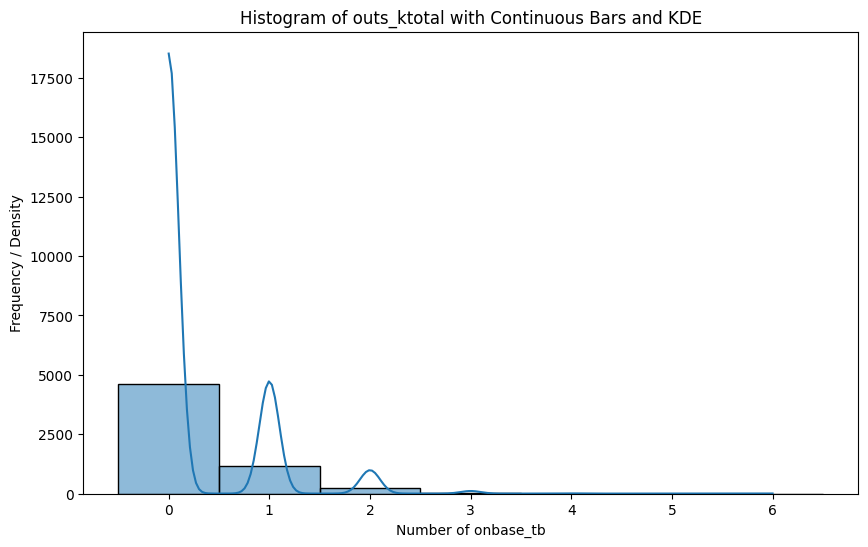

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your final training data is in a DataFrame called final_training_df
target_variable = final_training_df['rushing_touchdowns']

plt.figure(figsize=(10, 6))
sns.histplot(target_variable, kde=True, discrete=True)
plt.title('Histogram of outs_ktotal with Continuous Bars and KDE')
plt.xlabel('Number of onbase_tb')
plt.ylabel('Frequency / Density')
plt.show()

In [50]:
target_variable.unique()

array([0., 1., 3., 2., 4., 6.])

In [51]:
print((target_variable.value_counts(normalize=True).sort_index()))

rushing_touchdowns
0.0    0.760454
1.0    0.194106
2.0    0.040500
3.0    0.004445
4.0    0.000329
6.0    0.000165
Name: proportion, dtype: float64


In [52]:
# import numpy as np

# Specify the column for analysis
col = 'rushing_touchdowns'

# Calculate variance
variance = final_training_df[col].var()
print(f"Variance ({col}): {variance}")

# Calculate standard deviation
std_dev = final_training_df[col].std()
print(f"Standard Deviation ({col}): {std_dev}")

# Calculate range
range_val = final_training_df[col].max() - final_training_df[col].min()
print(f"Range ({col}): {range_val}")

# Calculate interquartile range (IQR)
q1 = final_training_df[col].quantile(0.25)
q3 = final_training_df[col].quantile(0.75)
iqr = q3 - q1
print(f"IQR ({col}): {iqr}")

# Calculate mean absolute deviation (MAD)
mean_val = final_training_df[col].mean()
print(f"Mean ({col}): {mean_val}")  # <--- This line prints the mean
mad = np.mean(np.abs(final_training_df[col] - mean_val))
print(f"Mean Absolute Deviation ({col}): {mad}")

# Calculate coefficient of variation (CV)
cv = (std_dev / mean_val) * 100
print(f"Coefficient of Variation (%) ({col}): {cv}")

# Calculate variance-to-mean ratio (for count data)
if mean_val != 0:
    variance_to_mean = variance / mean_val
    print(f"Variance-to-Mean Ratio ({col}): {variance_to_mean}")
else:
    print(f"Mean is zero for {col}, cannot calculate Variance-to-Mean Ratio.")


Variance (rushing_touchdowns): 0.32282891595347374
Standard Deviation (rushing_touchdowns): 0.5681803551280823
Range (rushing_touchdowns): 6.0
IQR (rushing_touchdowns): 0.0
Mean (rushing_touchdowns): 0.29074744813961145
Mean Absolute Deviation (rushing_touchdowns): 0.44220035000226054
Coefficient of Variation (%) (rushing_touchdowns): 195.42058193929626
Variance-to-Mean Ratio (rushing_touchdowns): 1.1103413564560587


In [53]:
final_training_df['rushing_touchdowns_cat']  = np.where(final_training_df['rushing_touchdowns']==0,0,1)

In [54]:
X = final_training_df.drop(columns=['rushing_touchdowns', 'rushing_touchdowns_cat'])
y = final_training_df[['rushing_touchdowns', 'rushing_touchdowns_cat']]

In [55]:
X.columns

Index(['rushing_attempts_prev_7_games_career_sum',
       'rushing_yards_prev_7_games_career_sum',
       'rushing_touchdowns_prev_7_games_career_sum',
       'rushing_first_downs_prev_7_games_career_sum',
       'rushing_avg_yards_prev_7_games_career_mean',
       'rushing_longest_prev_7_games_career_mean',
       'rushing_redzone_attempts_prev_7_games_career_sum',
       'rushing_tlost_prev_7_games_career_sum',
       'rushing_tlost_yards_prev_7_games_career_sum',
       'rushing_broken_tackles_prev_7_games_career_sum',
       'rushing_scrambles_prev_7_games_career_sum',
       'rushing_yards_after_contact_prev_7_games_career_sum',
       'defense_tackles_prev_7_games_career_sum',
       'defense_assists_prev_7_games_career_sum',
       'defense_combined_prev_7_games_career_sum',
       'defense_sacks_prev_7_games_career_sum',
       'defense_sack_yards_prev_7_games_career_sum',
       'defense_interceptions_prev_7_games_career_sum',
       'defense_passes_defended_prev_7_games_caree

In [56]:
X.shape

(6074, 46)

In [57]:
X.dtypes

rushing_attempts_prev_7_games_career_sum                   float64
rushing_yards_prev_7_games_career_sum                      float64
rushing_touchdowns_prev_7_games_career_sum                 float64
rushing_first_downs_prev_7_games_career_sum                float64
rushing_avg_yards_prev_7_games_career_mean                 float64
rushing_longest_prev_7_games_career_mean                   float64
rushing_redzone_attempts_prev_7_games_career_sum           float64
rushing_tlost_prev_7_games_career_sum                      float64
rushing_tlost_yards_prev_7_games_career_sum                float64
rushing_broken_tackles_prev_7_games_career_sum             float64
rushing_scrambles_prev_7_games_career_sum                  float64
rushing_yards_after_contact_prev_7_games_career_sum        float64
defense_tackles_prev_7_games_career_sum                    float64
defense_assists_prev_7_games_career_sum                    float64
defense_combined_prev_7_games_career_sum                   flo

In [58]:
# X.to_csv('../../../data/spain_soccer_shots_on_target_training_data_v002.csv', index= False)

In [59]:
for column in X.columns:
    # Check if the column is of boolean type
    if X[column].dtype == 'bool':
        # Convert the boolean column to integers (1 for True, 0 for False)
        X[column] = X[column].astype(int)

In [60]:
# X['opponent'] = X['opponent'].apply(lambda x:str(x))

In [61]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Example: X (features), y (strikeouts)
# X = sm.add_constant(X)  # statsmodels requires constant
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
_X_train, _X_test, _y_train, _y_test = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [63]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    log_loss
)
import matplotlib.pyplot as plt
import seaborn as sns

brf_classifier = BalancedRandomForestClassifier(n_estimators=100,
                                                sampling_strategy='auto', # Default: undersample majority class(es)
                                                replacement=False,        # Sample without replacement for undersampling
                                                random_state=42,
                                                n_jobs=-1)

print("BalancedRandomForestClassifier instance created.")
print(brf_classifier)
print("-" * 50)


brf_classifier.fit(_X_train, _y_train['rushing_touchdowns_cat'])


y_pred_brf = brf_classifier.predict(_X_test)
y_test_pred_proba_brf = brf_classifier.predict_proba(_X_test)[:, 1] # Probabilities for the positive class

y_train_pred_proba_brf = brf_classifier.predict_proba(_X_train)[:,1]

BalancedRandomForestClassifier instance created.
BalancedRandomForestClassifier(n_jobs=-1, random_state=42, replacement=False,
                               sampling_strategy='auto')
--------------------------------------------------


--- COMMON CLASSIFICATION METRICS ---
Accuracy: 0.6305
Precision: 0.3780
Recall: 0.7166
F1-Score: 0.4949
----------------------------------------------------------------------
Confusion Matrix:
[[546 362]
 [ 87 220]]


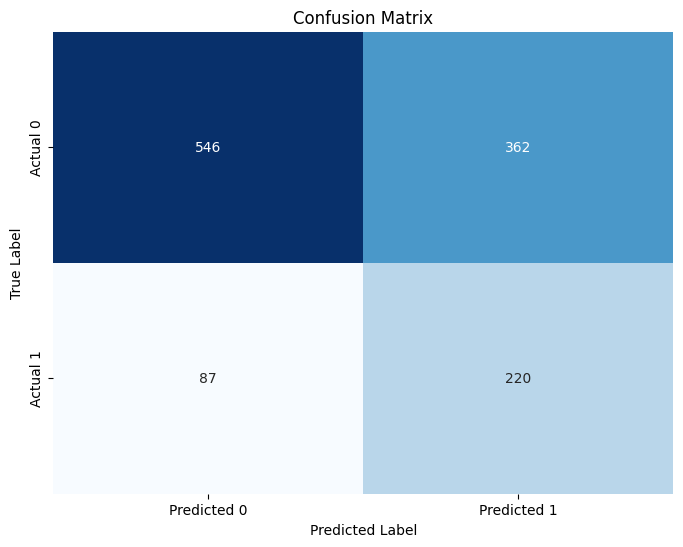

----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       908
           1       0.38      0.72      0.49       307

    accuracy                           0.63      1215
   macro avg       0.62      0.66      0.60      1215
weighted avg       0.74      0.63      0.65      1215

----------------------------------------------------------------------
ROC AUC Score: 0.6913


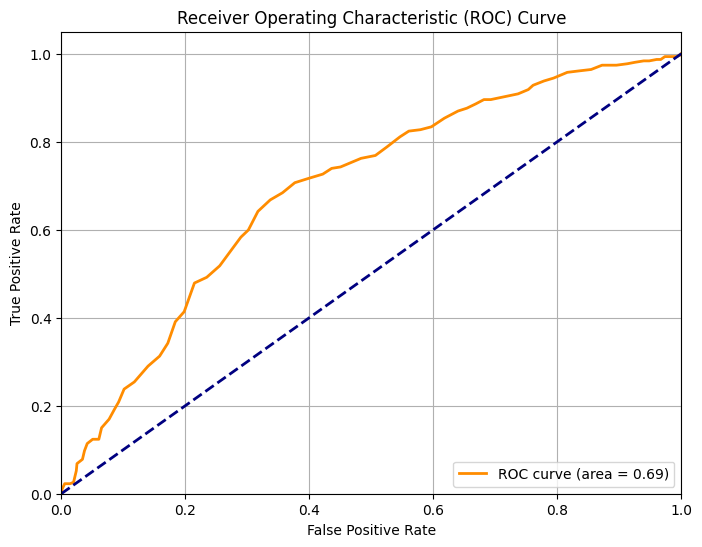

----------------------------------------------------------------------


In [64]:
print("--- COMMON CLASSIFICATION METRICS ---")

accuracy = accuracy_score(_y_test['rushing_touchdowns_cat'], y_pred_brf)
print(f"Accuracy: {accuracy:.4f}")


precision = precision_score(_y_test['rushing_touchdowns_cat'], y_pred_brf)
print(f"Precision: {precision:.4f}")

recall = recall_score(_y_test['rushing_touchdowns_cat'], y_pred_brf)
print(f"Recall: {recall:.4f}")


f1 = f1_score(_y_test['rushing_touchdowns_cat'], y_pred_brf)
print(f"F1-Score: {f1:.4f}")

print("-" * 70)


# Rows are actual classes, columns are predicted classes.
# [ [TN, FP],
#   [FN, TP] ]
conf_matrix = confusion_matrix(_y_test['rushing_touchdowns_cat'], y_pred_brf)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix (optional, but highly recommended)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("-" * 70)

# 6. Classification Report
# Definition: Provides a comprehensive summary of precision, recall, f1-score,
# and support for each class.
class_report = classification_report(_y_test['rushing_touchdowns_cat'], y_pred_brf)
print("Classification Report:")
print(class_report)

print("-" * 70)

# 7. ROC AUC (Receiver Operating Characteristic - Area Under the Curve)
# Definition: Measures the ability of a classifier to distinguish between classes.
# It's the area under the ROC curve, which plots the True Positive Rate (Recall)
# against the False Positive Rate at various threshold settings.
# A value of 0.5 indicates no discrimination, 1.0 indicates perfect discrimination.
# Requires predicted probabilities.
try:
    roc_auc = roc_auc_score(_y_test['rushing_touchdowns_cat'], y_test_pred_proba_brf)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plotting ROC Curve (optional, but good for visualization)
    fpr, tpr, thresholds = roc_curve(_y_test['rushing_touchdowns_cat'], y_test_pred_proba_brf)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

except ValueError as e:
    print(f"Could not calculate ROC AUC: {e}. Ensure y_test has at least two classes.")

print("-" * 70)

In [65]:
import xgboost as xgb

scale_pos_weight_value = (_y_train['rushing_touchdowns_cat'] == 0).sum() / (_y_train['rushing_touchdowns_cat'] == 1).sum()

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic',  # For binary classification
                                   eval_metric='logloss',        # Or 'auc'
                                   n_estimators=100,             # Number of boosting rounds
                                   learning_rate=0.1,
                                   max_depth=3,
                                   use_label_encoder=False,      # Suppress warning
                                   random_state=42,
                                   n_jobs=-1,
                                   scale_pos_weight=scale_pos_weight_value # Handle imbalance
                                  )

print("XGBClassifier instance created.")
print(xgb_classifier)
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")
print("-" * 50)


print("Fitting the XGBoost Classifier model...")
xgb_classifier.fit(_X_train, _y_train['rushing_touchdowns_cat'])
print("Model fitting complete!")
print("-" * 50)



XGBClassifier instance created.
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)
Calculated scale_pos_weight: 3.23
--------------------------------------------------
Fitting the XGBoost Classifier model...
Model fitting complete!
----------------------------------------------

C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:42:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Making predictions on the test set...

--- EVALUATION METRICS FOR XGBoost CLASSIFIER ---
Accuracy: 0.6420
Precision: 0.3788
Recall: 0.6515
F1-Score: 0.4790

Confusion Matrix:
[[580 328]
 [107 200]]


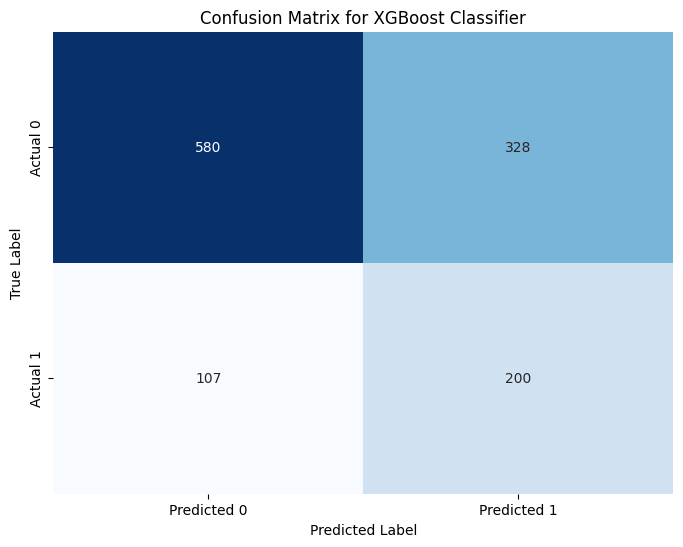


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73       908
           1       0.38      0.65      0.48       307

    accuracy                           0.64      1215
   macro avg       0.61      0.65      0.60      1215
weighted avg       0.73      0.64      0.66      1215

ROC AUC Score: 0.6977


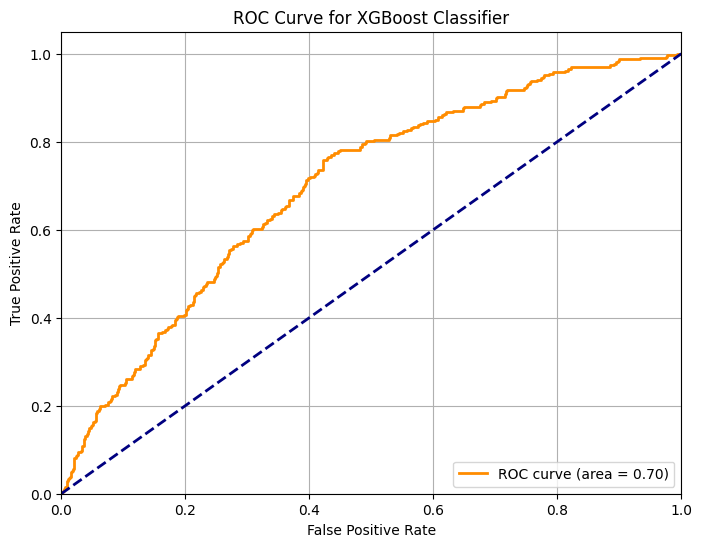

Log Loss: 0.6191
----------------------------------------------------------------------
Note: For imbalanced data, `scale_pos_weight` is a key parameter in XGBoost.
It helps give more weight to the minority class during training.


In [66]:

print("Making predictions on the test set...")
y_pred_xgb = xgb_classifier.predict(_X_test)
y_pred_proba_xgb = xgb_classifier.predict_proba(_X_test)[:, 1] # Probabilities for the positive class

print("\n--- EVALUATION METRICS FOR XGBoost CLASSIFIER ---")

# Accuracy
accuracy = accuracy_score(_y_test['rushing_touchdowns_cat'], y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-Score
precision = precision_score(_y_test['rushing_touchdowns_cat'], y_pred_xgb, zero_division=0)
recall = recall_score(_y_test['rushing_touchdowns_cat'], y_pred_xgb, zero_division=0)
f1 = f1_score(_y_test['rushing_touchdowns_cat'], y_pred_xgb, zero_division=0)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(_y_test['rushing_touchdowns_cat'], y_pred_xgb)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report = classification_report(_y_test['rushing_touchdowns_cat'], y_pred_xgb, zero_division=0)
print("\nClassification Report:\n", class_report)

# ROC AUC
try:
    roc_auc = roc_auc_score(_y_test['rushing_touchdowns_cat'], y_pred_proba_xgb)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    fpr, tpr, thresholds = roc_curve(_y_test['rushing_touchdowns_cat'], y_pred_proba_xgb)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

except ValueError as e:
    print(f"Could not calculate ROC AUC: {e}. Ensure y_test has at least two classes.")

# Log Loss
try:
    logloss = log_loss(_y_test['rushing_touchdowns_cat'], xgb_classifier.predict_proba(_X_test))
    print(f"Log Loss: {logloss:.4f}")
except ValueError as e:
    print(f"Could not calculate Log Loss: {e}. Ensure probabilities are correctly formatted.")

print("-" * 70)
print("Note: For imbalanced data, `scale_pos_weight` is a key parameter in XGBoost.")
print("It helps give more weight to the minority class during training.")

In [67]:
y_test_pred_proba_xgb = xgb_classifier.predict_proba(_X_test)[:, 1] # Probabilities for the positive class

y_train_pred_proba_xgb = xgb_classifier.predict_proba(_X_train)[:,1]

X_train['brf_pred'] = y_train_pred_proba_brf
X_test['brf_pred'] = y_test_pred_proba_brf
X_train['xgb_pred'] = y_train_pred_proba_xgb
X_test['xgb_pred'] = y_test_pred_proba_xgb

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                                 random_state=42,
                                 n_jobs=-1,       # Use all available cores
                                 max_depth=10,    # Maximum depth of the trees (tune this)
                                 min_samples_split=2, # Minimum samples required to split a node (tune this)
                                 min_samples_leaf=1)  # Minimum samples required at a leaf node (tune this)

rf_model.fit(X_train, y_train['rushing_touchdowns'])

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

##### function to calculate the prediction and the over and under probability

In [69]:
def predict(model, y_test, threshold):

    strikeout_prediction = model.predict(y_test)
    y_test = y_test.values.reshape(1, -1) \
                              if isinstance(y_test, pd.Series) \
                              else y_test.reshape(1, -1)
    
    preds_array = np.array([tree.predict(y_test)[0] for tree in model.estimators_])

    mean_pred = np.mean(preds_array)
    std_dev_pred = np.std(preds_array)

    # Create the fitted normal distribution
    fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

    if std_dev_pred == 0:
        prob_over_threshold = 1.0 if strikeout_prediction > threshold else 0.0
        prob_under_threshold = 1.0 - prob_over_threshold
    else:
        # Create the fitted normal distribution
        fitted_normal_dist = norm(loc=mean_pred, scale=std_dev_pred)

        # Calculate probability over the threshold (Survival Function)
        prob_over_threshold = fitted_normal_dist.sf(threshold)

        # Calculate probability under the threshold (Cumulative Distribution Function)
        prob_under_threshold = fitted_normal_dist.cdf(threshold)

    print(f"Overall Prediction: {strikeout_prediction:.4f}")
    print(f"Parametric P(X > {threshold}) (Over Probability): {prob_over_threshold:.4f}")
    print(f"Parametric P(X <= {threshold}) (Under Probability): {prob_under_threshold:.4f}")

    return {
        'overall_prediction': strikeout_prediction,
        'prob_over_threshold': prob_over_threshold,
        'prob_under_threshold': prob_under_threshold
    }
        

##### calculate the over probability using prediction distribution

In [75]:
X_exp = X_test.iloc[0]
y_exp = y_test['rushing_touchdowns'].iloc[0]

X_exp = X_exp.values.reshape(1, -1) \
                              if isinstance(X_exp, pd.Series) \
                              else X_exp.reshape(1, -1)
X_exp

array([[117.        , 480.        ,   2.        ,  24.        ,
          4.75757143,  23.42857143,  21.        ,  17.        ,
        -48.        ,   5.        ,   0.        , 192.        ,
        293.        , 167.        , 460.        ,  16.        ,
         89.        ,  11.        ,  26.        ,   2.        ,
          2.        ,  37.        ,  29.        , 127.        ,
          0.        ,  76.        ,  25.        ,  19.        ,
         29.        ,   4.        , 214.        , 150.        ,
         11.        ,   2.        ,   8.        ,   7.        ,
         57.14285714,  17.        ,  11.        ,  61.90471429,
         83.        ,  31.        ,  38.061     ,   8.        ,
          7.        ,  64.28571429,   0.61      ,   0.65237939]])

In [76]:
trees = rf_model.estimators_
# trees

In [77]:
# all_preds = [tree.predict(X_exp) for tree in trees]
# all_preds
all_predictions = []
for tree in trees:
    predictions = tree.predict(X_exp)
    all_predictions.append(predictions)
all_predictions

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array

In [78]:
preds_array = np.array([arr[0] for arr in all_predictions])

preds_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
pred_err = preds_array-y_exp
pred_err

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
np.mean(preds_array)

np.float64(0.0)

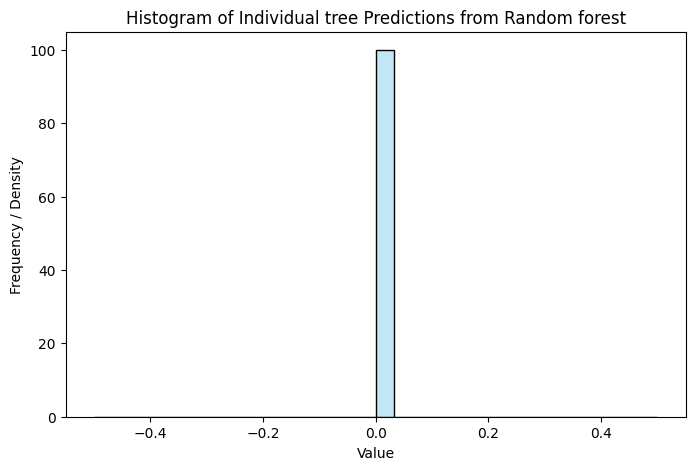

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=preds_array, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of Individual tree Predictions from Random forest")

# Display the plot
plt.show()

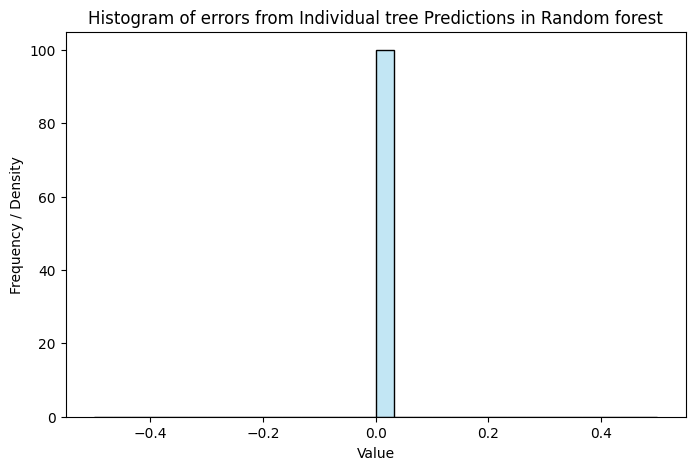

In [82]:
plt.figure(figsize=(8, 5)) # Optional: Set figure size for better readability

sns.histplot(data=pred_err, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency / Density") # Y-axis label changes if kde=True
plt.title("Histogram of errors from Individual tree Predictions in Random forest")

# Display the plot
plt.show()

In [83]:
# with open('../../../models/spain_soccer_rf_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test['rushing_touchdowns'], y_pred_rf)
mae = mean_absolute_error(y_test['rushing_touchdowns'], y_pred_rf)
r2 = r2_score(y_test['rushing_touchdowns'], y_pred_rf)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.42
Mean Absolute Error (MAE): 0.31
R-squared (R2): -0.26


In [97]:
y_df = y_test.copy()
y_df['y_pred_brf'] = y_pred_brf
y_df['y_pred_rf'] = y_pred_rf
# y_df = pd.concat([y_test, pd.Series(y_pred_brf), pd.Series(y_pred_rf)], axis = 1)

y_df.to_csv(r'../../../../data/nfl_rushing_touchdowns_multimodel_output.csv', index = False)

In [93]:
y_df.head()

,rushing_touchdowns,rushing_touchdowns_cat,0
740,0.0,0.0,NaN
3020,0.0,0.0,NaN
4529,1.0,1.0,NaN
3408,1.0,1.0,NaN
4599,2.0,1.0,NaN


In [86]:
# Note on handling count data with RandomForestRegressor:
# RandomForestRegressor predicts continuous values. For count data, the predictions will be floating-point numbers.
# You might want to round these predictions to the nearest integer for interpretation as counts.
y_pred_rounded = np.round(y_pred_rf).astype(int)

print("\nRounded Predictions (first 20):")
print(y_pred_rounded[:20])
print("\nActual Test Values (first 20):")
print(y_test['rushing_touchdowns'].head(20).values)

# Evaluate rounded predictions (
mse_rounded = mean_squared_error(y_test['rushing_touchdowns'], y_pred_rounded)
mae_rounded = mean_absolute_error(y_test['rushing_touchdowns'], y_pred_rounded)
r2_rounded = r2_score(y_test['rushing_touchdowns'], y_pred_rounded)

print("\nRandom Forest Regressor Evaluation (Rounded Predictions):")
print(f"Mean Squared Error (MSE): {mse_rounded:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rounded:.2f}")
print(f"R-squared (R2): {r2_rounded:.2f}")


Rounded Predictions (first 20):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Actual Test Values (first 20):
[0. 0. 1. 1. 2. 3. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Random Forest Regressor Evaluation (Rounded Predictions):
Mean Squared Error (MSE): 0.42
Mean Absolute Error (MAE): 0.31
R-squared (R2): -0.26


In [87]:
# Define the bins (bucket boundaries)
bins = [-1, 0, 1, 2, 3, 4, 5, float('inf')] # -1 to capture exactly 0, float('inf') for the open-ended last bucket

# Define the labels for each bucket
labels = ['<0', '0', '1', '2', '3', '4', '5+']

# Use pd.cut to categorize the data into buckets
y_test_buckets = pd.cut(y_train['rushing_touchdowns'], bins=bins, labels=labels, right=False)
# 'right=False' means the bins include the left boundary but exclude the right boundary,
# e.g., [0, 5) means 0 up to (but not including) 5.

# Get the count of values in each bucket
distribution = y_test_buckets.value_counts().sort_index()
print(distribution)

rushing_touchdowns
<0       0
0     3711
1      932
2      192
3       22
4        1
5+       1
Name: count, dtype: int64


In [ ]:
# # Assuming X_test contains the features for prediction
# y_pred = rf_model.predict(X_test)

# # Assuming y_test is a DataFrame or you want to create one for results
# # If y_test is a Series, convert it to a DataFrame first if you want to add a new column
# if isinstance(y_test, pd.Series):
#     y_test_df = y_test.to_frame(name='actual_values') # Name the column appropriately
# else:
#     y_test_df = y_test

# y_test_df['preds'] = y_pred
# y_test_df.to_csv('../../../data/spain_soccer_shots_on_target_y_test.csv', index=False)

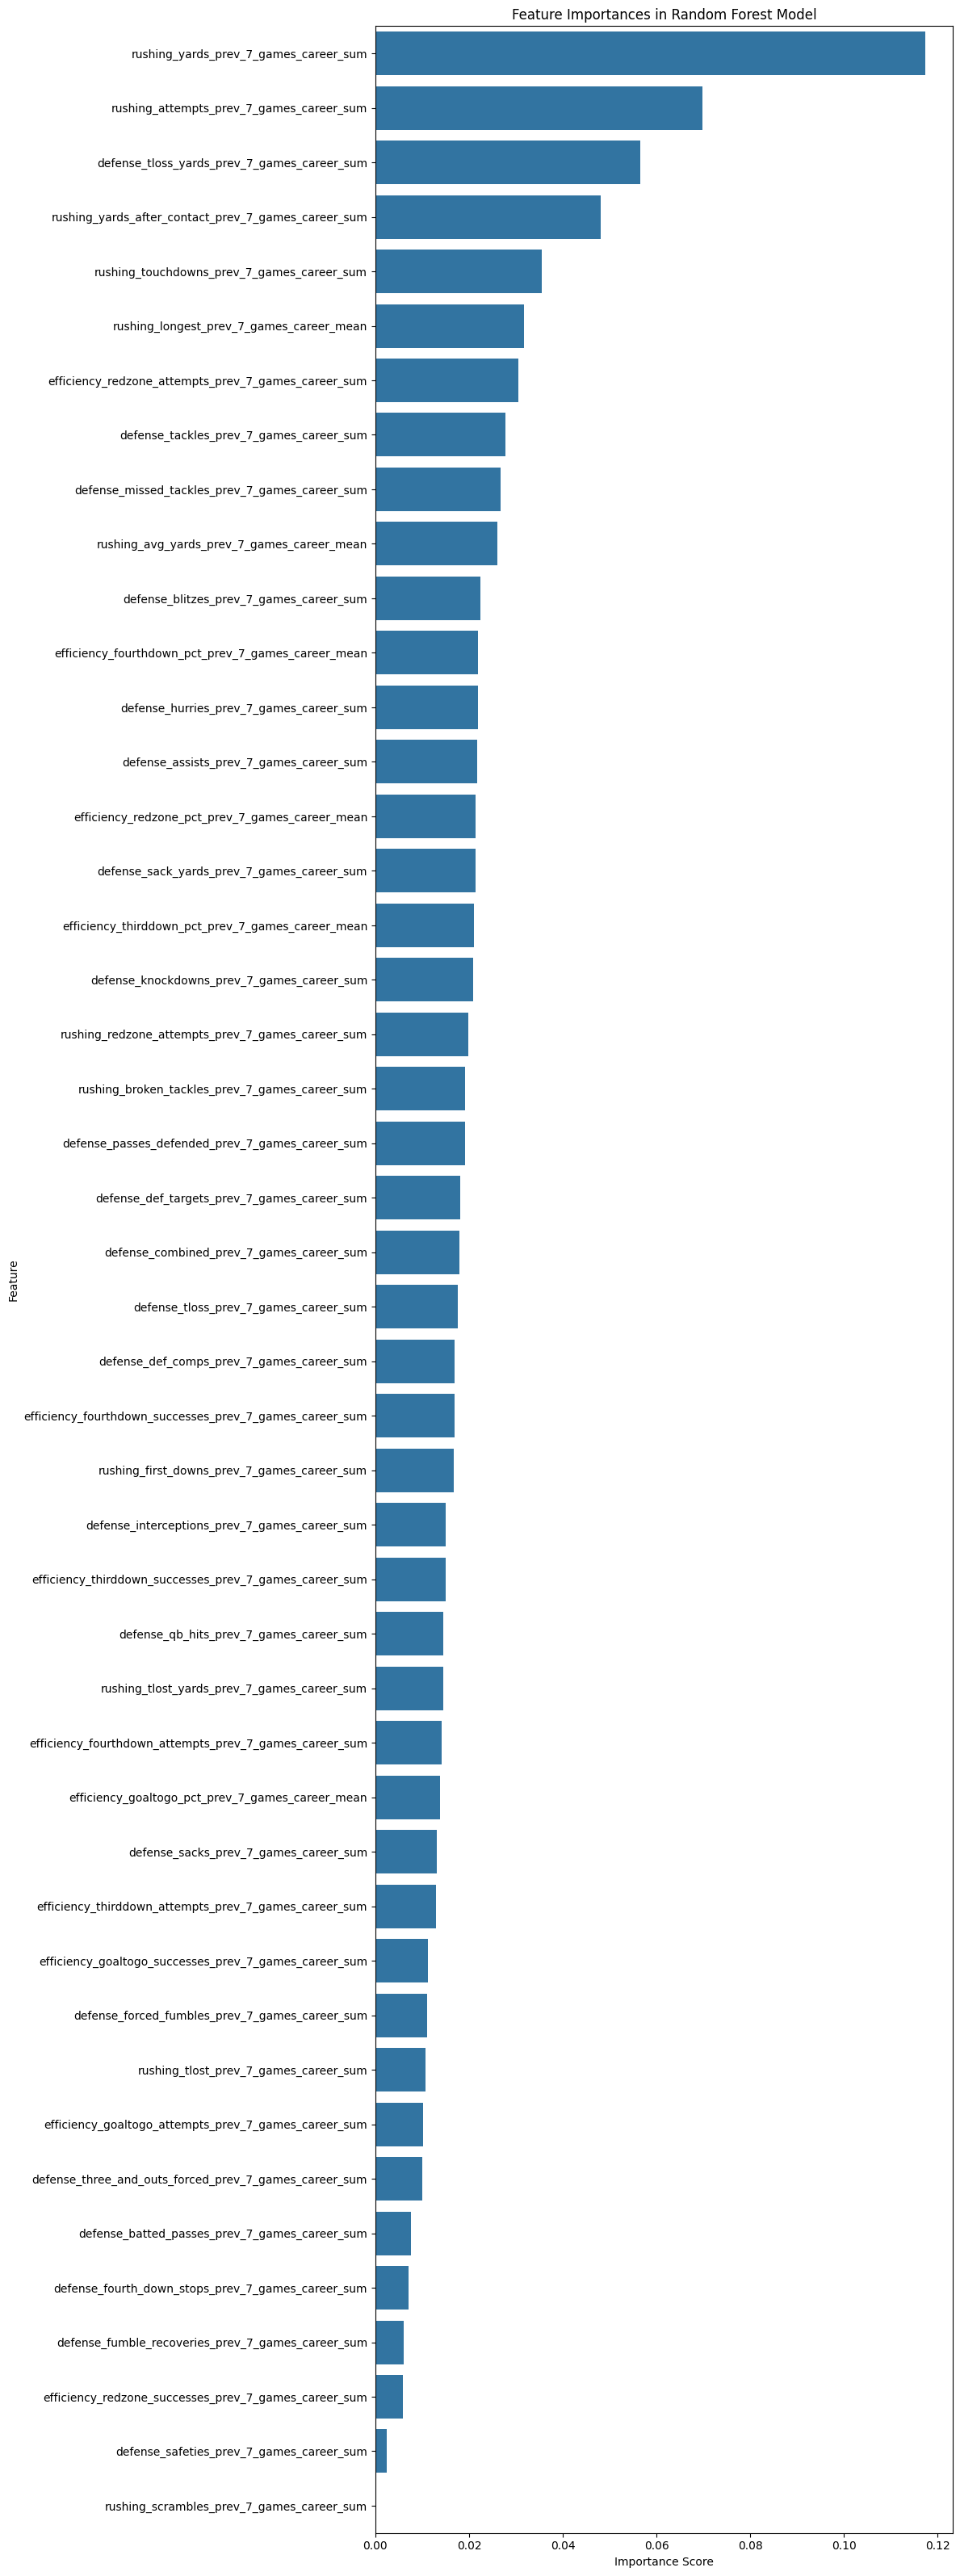


Feature Importance:
rushing_yards_prev_7_games_career_sum: 0.1174
rushing_attempts_prev_7_games_career_sum: 0.0699
defense_tloss_yards_prev_7_games_career_sum: 0.0565
rushing_yards_after_contact_prev_7_games_career_sum: 0.0481
rushing_touchdowns_prev_7_games_career_sum: 0.0356
rushing_longest_prev_7_games_career_mean: 0.0317
efficiency_redzone_attempts_prev_7_games_career_sum: 0.0305
defense_tackles_prev_7_games_career_sum: 0.0278
defense_missed_tackles_prev_7_games_career_sum: 0.0267
rushing_avg_yards_prev_7_games_career_mean: 0.0261
defense_blitzes_prev_7_games_career_sum: 0.0225
efficiency_fourthdown_pct_prev_7_games_career_mean: 0.0219
defense_hurries_prev_7_games_career_sum: 0.0219
defense_assists_prev_7_games_career_sum: 0.0217
efficiency_redzone_pct_prev_7_games_career_mean: 0.0214
defense_sack_yards_prev_7_games_career_sum: 0.0214
efficiency_thirddown_pct_prev_7_games_career_mean: 0.0210
defense_knockdowns_prev_7_games_career_sum: 0.0208
rushing_redzone_attempts_prev_7_games_c

In [ ]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
sorted_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
sorted_feature_names = [item[0] for item in sorted_importance]
sorted_importances = [item[1] for item in sorted_importance]

# Create the bar plot
plt.figure(figsize=(12, 32))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

In [ ]:
# with open('../../../../models/nfl_rb_rushing_touchdowns_2023_24_player_opponent_stats_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [ ]:
to stop the execution of the script here

SyntaxError: invalid syntax (3122771044.py, line 1)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5 # For example, 5-fold cross-validation

print(f"Performing {n_splits}-fold cross-validation...")

# --- Evaluate using Mean Squared Error (MSE) ---
# cross_val_score by default tries to maximize the score, so for MSE (which is a loss),
# we need to specify 'neg_mean_squared_error' and then negate the result.
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-validated MSE scores for each fold: {mse_scores}")
print(f"Mean Cross-validated MSE: {np.mean(mse_scores):.4f}")
print(f"Standard Deviation of Cross-validated MSE: {np.std(mse_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using Mean Absolute Error (MAE) ---
mae_scores = -cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='neg_mean_absolute_error', n_jobs=-1)
print(f"Cross-validated MAE scores for each fold: {mae_scores}")
print(f"Mean Cross-validated MAE: {np.mean(mae_scores):.4f}")
print(f"Standard Deviation of Cross-validated MAE: {np.std(mae_scores):.4f}")

print("\n" + "="*50 + "\n")

# --- Evaluate using R-squared (R2) ---
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=n_splits, scoring='r2', n_jobs=-1)
print(f"Cross-validated R2 scores for each fold: {r2_scores}")
print(f"Mean Cross-validated R2: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation of Cross-validated R2: {np.std(r2_scores):.4f}")

print("\nCross-validation complete.")


Performing 5-fold cross-validation...
Cross-validated MSE scores for each fold: [0.29452836 0.3212076  0.28044357 0.25408512 0.33043693]
Mean Cross-validated MSE: 0.2961
Standard Deviation of Cross-validated MSE: 0.0276


Cross-validated MAE scores for each fold: [0.37586404 0.3915675  0.37631365 0.36469601 0.40328593]
Mean Cross-validated MAE: 0.3823
Standard Deviation of Cross-validated MAE: 0.0135


Cross-validated R2 scores for each fold: [ 0.08141929  0.05634842 -0.01377302  0.08805435  0.0005557 ]
Mean Cross-validated R2: 0.0425
Standard Deviation of Cross-validated R2: 0.0417

Cross-validation complete.


In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning with GridSearchCV ---
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# We use 'neg_mean_squared_error' as the scoring metric for tuning
# cv=n_splits ensures that tuning is also done with cross-validation
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=n_splits,
                           scoring='neg_mean_squared_error', # Use a single metric for tuning
                           n_jobs=-1,
                           verbose=2) # Set verbose to 2 to see progress

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("\nHyperparameter tuning complete.")

# Print the best parameters and best score found
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated MSE (negative, so smaller absolute value is better): {-grid_search.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Regressor model (after tuning):")
print(best_rf_model)

# You can now use best_rf_model for final predictions on X_test
# For example:
y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"\nMSE on test set with tuned model: {mse_tuned:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Hyperparameter tuning complete.
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated MSE (negative, so smaller absolute value is better): 0.2911

Best Random Forest Regressor model (after tuning):
RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

MSE on test set with tuned model: 0.2927


In [ ]:
rf_model_hp_tuned = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

rf_model_hp_tuned.fit(X_train, y_train)

y_preds_hp = rf_model_hp_tuned.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_preds_hp)
mae = mean_absolute_error(y_test, y_preds_hp)
r2 = r2_score(y_test, y_preds_hp)

print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.29
Mean Absolute Error (MAE): 0.40
R-squared (R2): 0.08


In [ ]:
# with open('../../../models/spain_soccer_strikeouts_rf_hp_tuned_2024_v001.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)
# with open('../../../../models/nfl_qb_passing_yards_v002.pkl', 'wb') as f:
#     pickle.dump(rf_model_hp_tuned, f)

In [ ]:
print("Fitting Zero-Inflated Poisson (ZIP) Model...")
try:
    zip_model = sm.ZeroInflatedPoisson(
        endog=y_train,        # Dependent variable (counts)
        exog=X_train,         # Independent variables for the count part (Poisson) - now includes constant
        exog_infl=X_train     # Independent variables for the zero-inflation part (logistic) - now includes constant
    )

    # Fit the model
    zip_results = zip_model.fit()

    print("\nZIP Model Summary:")
    print(zip_results.summary())
    print("-" * 50)

    # --- 3. Make Predictions ---
    # Predictions from ZeroInflatedPoisson are expected values (can be float)
    y_pred_zip_continuous = zip_results.predict(exog=X_test, exog_infl=X_test) # Updated: Use X_test directly

    # Since the target is counts, post-process by rounding and ensuring non-negativity
    y_pred_zip_final = np.round(y_pred_zip_continuous)
    y_pred_zip_final = np.maximum(0, y_pred_zip_final) # Ensure no negative counts

    print("\nPredictions made and post-processed.")
    print(f"Sample of continuous predictions: {y_pred_zip_continuous[:5]}")
    print(f"Sample of final (rounded & clipped) predictions: {y_pred_zip_final[:5]}")
    print("-" * 50)

    # --- 4. Evaluate the Model ---
    print("Evaluating ZIP Model performance:")
    mse = mean_squared_error(y_test, y_pred_zip_final)
    mae = mean_absolute_error(y_test, y_pred_zip_final)
    r2 = r2_score(y_test, y_pred_zip_final)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 50)

except Exception as e:
    print(f"An error occurred during model fitting or prediction: {e}")
    print("Please ensure your 'endog' (y) values are non-negative and your 'exog' (X) values are appropriate.")
    print("Also, ensure 'statsmodels' is installed (`pip install statsmodels`).")

Fitting Zero-Inflated Poisson (ZIP) Model...


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:1331: RuntimeWarning: overflow encountered in exp
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

         Current function value: 4251.490799
         Iterations: 5
         Function evaluations: 48
         Gradient evaluations: 27


C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:629: RuntimeWarning: overflow encountered in exp
  coeff = (1 + w[zero_idx] * (np.exp(mu[zero_idx]) - 1))
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: overflow encountered in exp
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\count_model.py:637: RuntimeWarning: invalid value encountered in divide
  w[zero_idx] * mu[zero_idx] * np.exp(mu[zero_idx]) /
C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\si


ZIP Model Summary:
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:             runs_earned   No. Observations:                15773
Model:             ZeroInflatedPoisson   Df Residuals:                    15593
Method:                            MLE   Df Model:                          179
Date:                 Tue, 27 May 2025   Pseudo R-squ.:                  -3171.
Time:                         10:51:40   Log-Likelihood:            -6.7059e+07
converged:                       False   LL-Null:                       -21141.
Covariance Type:             nonrobust   LLR p-value:                     1.000
                                                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
inflate_venue_capacity                                                

C:\Users\PrudhviRajuV\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
